#Install & Import Necessary **Libraries**

In [1]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [2]:
!pip install statsmodels hurst scikit-learn

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
import matplotlib.pyplot as plt
import itertools
from sklearn.cluster import OPTICS
from hurst import compute_Hc
from scipy import stats
import statsmodels.api as sm

In [30]:
tickers = [
    'ADANIENT.NS', 'ADANIPORTS.NS', 'AMBUJACEM.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
    'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BPCL.NS',
    'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS',
    'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS',
    'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS',
    'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS',
    'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS',
    'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS',
    'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TCS.NS',
    'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS',
    'ABB.NS', 'ADANIGREEN.NS', 'ADANITRANS.NS', 'ALKEM.NS', 'AUROPHARMA.NS',
    'BAJAJHLDNG.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BEL.NS', 'BIOCON.NS',
    'CANBK.NS', 'CHOLAFIN.NS', 'DABUR.NS', 'DLF.NS', 'GAIL.NS',
    'GLAND.NS', 'GODREJCP.NS', 'HAVELLS.NS', 'ICICIGI.NS', 'ICICIPRULI.NS',
    'INDIGO.NS', 'INDUSTOWER.NS', 'IRCTC.NS', 'JINDALSTEL.NS', 'L&TFH.NS',
    'LICI.NS', 'MARICO.NS', 'MCDOWELL-N.NS', 'MUTHOOTFIN.NS', 'NAUKRI.NS',
    'NMDC.NS', 'OBEROIRLTY.NS', 'PEL.NS', 'PIIND.NS', 'PGHH.NS',
    'PNB.NS', 'RECLTD.NS', 'SAIL.NS', 'SHREECEM.NS', 'SIEMENS.NS',
    'SRF.NS', 'TATACOMM.NS', 'TATAPOWER.NS', 'TORNTPHARM.NS', 'TVSMOTOR.NS',
    'UBL.NS', 'VOLTAS.NS', 'ZOMATO.NS', 'GOLDBEES.NS', 'SILVERBEES.NS',
    'NIFTYBEES.NS', 'BANKBEES.NS', 'ENERGYBEES.NS', 'FINBEES.NS',
    'ESCORTS.NS', 'MPHASIS.NS', 'IDFCFIRSTB.NS', 'IIFL.NS', 'JSWENERGY.NS',
    'AARTIIND.NS', 'AUBANK.NS', 'BALRAMCHIN.NS', 'BATAINDIA.NS', 'BEML.NS',
    'CROMPTON.NS', 'CUB.NS', 'DEEPAKNTR.NS', 'EDELWEISS.NS', 'EMAMILTD.NS',
    'GODREJIND.NS', 'GODREJPROP.NS', 'GRANULES.NS', 'GUJGASLTD.NS', 'HUDCO.NS',
    'IGL.NS', 'INDIAMART.NS', 'JUBLFOOD.NS', 'LALPATHLAB.NS', 'LAURUSLABS.NS',
    'LTI.NS', 'LTTS.NS', 'MAHINDCIE.NS', 'MAHLOG.NS', 'METROPOLIS.NS',
    'MFSL.NS', 'MGL.NS', 'NAVINFLUOR.NS', 'NAM-INDIA.NS', 'NHPC.NS',
    'OFSS.NS', 'PAGEIND.NS', 'PETRONET.NS', 'PNCINFRA.NS', 'POLYCAB.NS',
    'PRAJIND.NS', 'RAJESHEXPO.NS', 'RBLBANK.NS', 'RELAXO.NS', 'RENUKA.NS',
    'SJVN.NS', 'SKFINDIA.NS', 'SOLARA.NS', 'SYNGENE.NS', 'TATACHEM.NS',
    'TATAELXSI.NS', 'TTKPRESTIG.NS', 'UCOBANK.NS', 'UNIONBANK.NS', 'UJJIVAN.NS',
    'VGUARD.NS', 'VINATIORGA.NS', 'WHIRLPOOL.NS', 'ZEEL.NS', 'YESBANK.NS',
    'INDIACEM.NS', 'RITES.NS', 'CANFINHOME.NS', 'ICRA.NS', 'MAZDOCK.NS',
    'IRFC.NS', 'IRCON.NS', 'CAMS.NS', 'KPRMILL.NS', 'SOBHA.NS',
    'TATAMTRDVR.NS', 'INDIANB.NS', 'FINEORG.NS', 'KSB.NS', 'TATVA.NS',
    'HAPPSTMNDS.NS', 'COFORGE.NS', 'GLENMARK.NS', 'TRIDENT.NS', 'BAJAJCON.NS',
    'CLEAN.NS', 'EQUITASBNK.NS', 'HFCL.NS', 'NCC.NS', 'DCMSHRIRAM.NS','BHARATFORG.NS'
    'APOLLOTYRE.NS', 'AMARAJABAT.NS', 'RATNAMANI.NS', 'SANOFI.NS', 'RAYMOND.NS'
]

# Pair selection period
start_train = "2019-04-01"
end_train = "2022-03-31"

# Backtesting period
start_test = "2022-04-01"
end_test = "2025-03-31"

In [31]:
prices = (yf.download(tickers, start=start_train, end=end_train, auto_adjust=True)["Close"].dropna(axis=1))
returns = prices.pct_change().dropna()

[*********************100%***********************]  192 of 192 completed
ERROR:yfinance:
11 Failed downloads:
ERROR:yfinance:['LTI.NS', 'MCDOWELL-N.NS', 'ENERGYBEES.NS', 'BHARATFORG.NSAPOLLOTYRE.NS', 'L&TFH.NS', 'MAHINDCIE.NS', 'ADANITRANS.NS', 'FINBEES.NS', 'UJJIVAN.NS', 'AMARAJABAT.NS']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['LICI.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-01 -> 2022-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1554057000, endDate = 1648665000")')


In [81]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS

def find_pairs_corr_then_optics(
    prices: pd.DataFrame,
    corr_thresh=0.4,
    pca_variance=0.90,
    optics_min_samples=3,
    optics_xi=0.05
):
    """
    Two-step approach to find pairs:
    1. First find correlated pairs above threshold
    2. Then filter those pairs by OPTICS clustering (with PCA preprocessing)

    Parameters:
    -----------
    prices : pd.DataFrame
        DataFrame with price time series (columns are tickers, rows are dates)
    corr_thresh : float
        Minimum absolute correlation threshold for initial pair selection
    pca_variance : float
        Target explained variance for PCA dimensionality reduction
    optics_min_samples : int
        Minimum samples parameter for OPTICS clustering
    optics_xi : float
        Xi parameter for OPTICS clustering

    Returns:
    --------
    list
        List of filtered pairs (ticker1, ticker2, correlation) that are both
        correlated and in the same OPTICS cluster
    """
    # Compute daily returns
    returns = prices.pct_change().dropna()

    # Step 1: Find correlated pairs
    print("Finding correlated pairs...")
    pairs_corr = []
    for t1, t2 in combinations(returns.columns, 2):
        corr = returns[t1].corr(returns[t2])
        if abs(corr) >= corr_thresh:
            pairs_corr.append((t1, t2, corr))

    print(f"→ {len(pairs_corr)} correlated pairs found with |corr| >= {corr_thresh}")

    # Step 2: Apply OPTICS clustering with PCA preprocessing
    print("Applying PCA preprocessing and OPTICS clustering...")

    # Shape (n_days, n_stocks) → we want (n_stocks, n_days)
    X = returns.T.values

    # Standardize across days
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # PCA to capture pca_variance of total variance
    pca = PCA(n_components=pca_variance, svd_solver='full')
    Xp = pca.fit_transform(Xs)
    print(f"PCA reduced to {Xp.shape[1]} components "
          f"({pca.explained_variance_ratio_.sum():.0%} variance)")

    # Apply OPTICS clustering on PCA-transformed data
    clust = OPTICS(min_samples=optics_min_samples, xi=optics_xi).fit(Xp)

    # Map tickers to cluster labels
    labels = dict(zip(returns.columns, clust.labels_))

    # Create DataFrame for cluster assignments
    cluster_df = pd.DataFrame({
        'ticker': returns.columns,
        'cluster': [labels[t] for t in returns.columns]
    })
    print("Cluster distribution:\n", cluster_df['cluster'].value_counts())

    # Filter pairs: keep only those where both tickers are in the same non-noise cluster
    pairs_filtered = [(t1, t2, corr) for t1, t2, corr in pairs_corr
                     if labels[t1] == labels[t2] and labels[t1] >= 0]

    print(f"→ {len(pairs_filtered)} pairs after OPTICS filtering")

    return pairs_filtered, labels

In [82]:
filtered_pairs, ticker_clusters = find_pairs_corr_then_optics(
        prices,
        corr_thresh=0.4,
        pca_variance=0.90,
        optics_min_samples=2,
        optics_xi=0.05
)

Finding correlated pairs...
→ 1292 correlated pairs found with |corr| >= 0.4
Applying PCA preprocessing and OPTICS clustering...
PCA reduced to 108 components (90% variance)
Cluster distribution:
 cluster
-1     122
 1       6
 0       6
 2       5
 4       4
 5       4
 3       3
 10      3
 11      2
 7       2
 9       2
 8       2
 12      2
 6       2
 13      2
Name: count, dtype: int64
→ 53 pairs after OPTICS filtering


###Cointegration Test

In [83]:
from statsmodels.tsa.stattools import coint
from scipy import stats
import numpy as np

def find_coint(pairs, data, p_thresh=0.1):
    out = []
    for i, j, _ in pairs:
        y = np.log(data[i])
        x = np.log(data[j])
        score, pv, _ = coint(y, x)
        if pv < p_thresh:
            β = stats.linregress(x, y).slope  # OLS: y = βx + ε
            out.append((i, j, pv, β))
    return sorted(out, key=lambda x: x[2])  # sort by p-value

In [84]:
coint_pairs = find_coint(filtered_pairs, prices)
print(f"→ {len(coint_pairs)} cointegrated pairs")
print(coint_pairs)

→ 12 cointegrated pairs
[('INFY.NS', 'TCS.NS', np.float64(0.00023808789262849122), np.float64(1.5039182994882232)), ('HCLTECH.NS', 'TCS.NS', np.float64(0.0057168765103773585), np.float64(1.3417756567202423)), ('HDFCBANK.NS', 'KOTAKBANK.NS', np.float64(0.010608408972962875), np.float64(1.0320432239750288)), ('HCLTECH.NS', 'INFY.NS', np.float64(0.023068422397579117), np.float64(0.8789430420809986)), ('TCS.NS', 'WIPRO.NS', np.float64(0.024806409201060656), np.float64(0.5966659090036305)), ('ASIANPAINT.NS', 'DABUR.NS', np.float64(0.03229184662626617), np.float64(2.0874126130394868)), ('IGL.NS', 'MGL.NS', np.float64(0.04165107964706696), np.float64(1.0707515922401827)), ('HINDUNILVR.NS', 'NESTLEIND.NS', np.float64(0.050607197449654154), np.float64(0.6523753073934216)), ('DABUR.NS', 'HINDUNILVR.NS', np.float64(0.05140631339103811), np.float64(0.9814127676758531)), ('BRITANNIA.NS', 'DABUR.NS', np.float64(0.06754280343149872), np.float64(0.849690385432636)), ('GRASIM.NS', 'ULTRACEMCO.NS', np.f

In [140]:
from hurst import compute_Hc
import numpy as np

def hurst_filter(pair_list, data, H_thresh=0.75):
    out = []
    for i, j, pv, β in pair_list:
        log_y = np.log(data[i])
        log_x = np.log(data[j])

        # Construct proper beta-adjusted spread
        spread = log_y - β * log_x

        # Compute Hurst exponent
        H, _, _ = compute_Hc(spread.values, kind="change", simplified=True)

        if H < H_thresh:
            out.append((i, j, pv, H, β))
    return out

hurst_pairs=hurst_filter(coint_pairs,prices)
print(len(hurst_pairs))
print(hurst_pairs)

12
[('INFY.NS', 'TCS.NS', np.float64(0.00023808789262849122), np.float64(0.6982812870553198), np.float64(1.5039182994882232)), ('HCLTECH.NS', 'TCS.NS', np.float64(0.0057168765103773585), np.float64(0.702271807584544), np.float64(1.3417756567202423)), ('HDFCBANK.NS', 'KOTAKBANK.NS', np.float64(0.010608408972962875), np.float64(0.6809954282072157), np.float64(1.0320432239750288)), ('HCLTECH.NS', 'INFY.NS', np.float64(0.023068422397579117), np.float64(0.6542160959997602), np.float64(0.8789430420809986)), ('TCS.NS', 'WIPRO.NS', np.float64(0.024806409201060656), np.float64(0.6290852496515003), np.float64(0.5966659090036305)), ('ASIANPAINT.NS', 'DABUR.NS', np.float64(0.03229184662626617), np.float64(0.6881939559301695), np.float64(2.0874126130394868)), ('IGL.NS', 'MGL.NS', np.float64(0.04165107964706696), np.float64(0.5716626536831314), np.float64(1.0707515922401827)), ('HINDUNILVR.NS', 'NESTLEIND.NS', np.float64(0.050607197449654154), np.float64(0.6621850401366676), np.float64(0.65237530739

In [172]:
from scipy import stats
import numpy as np

import numpy as np
import statsmodels.api as sm

import numpy as np
import statsmodels.api as sm

def half_life(spread):
    spread_lag = spread.shift(1).bfill()
    delta = spread - spread_lag
    spread_lag_with_const = sm.add_constant(spread_lag)

    model = sm.OLS(delta, spread_lag_with_const)
    result = model.fit()

    # Safely get the slope (coefficient of spread_lag)
    beta = result.params.iloc[1]

    # Handle non-mean-reverting cases
    if beta >= 0:
        return np.inf
    return -np.log(2) / beta



final_pairs = []

for i, j, pv, H, β in hurst_pairs:
    log_y = np.log(prices[i])
    log_x = np.log(prices[j])

    # Proper spread using precomputed β
    spread = log_y - β * log_x
    τ = half_life(spread)

    if 1 < τ < 60:
        z = (spread - spread.mean()) / spread.std()
        crosses = ((z.shift(1) * z) < 0).sum()
        if crosses >= 12:
            final_pairs.append((i, j, pv, H, τ, crosses, β))


In [173]:
print(f"→ {len(final_pairs)} eligible pairs after all filters")
print("Top pairs:", final_pairs[:12])

→ 12 eligible pairs after all filters
Top pairs: [('INFY.NS', 'TCS.NS', np.float64(0.00023808789262849122), np.float64(0.6982812870553198), np.float64(14.405655546705658), np.int64(60), np.float64(1.5039182994882232)), ('HCLTECH.NS', 'TCS.NS', np.float64(0.0057168765103773585), np.float64(0.702271807584544), np.float64(12.701322889788331), np.int64(73), np.float64(1.3417756567202423)), ('HDFCBANK.NS', 'KOTAKBANK.NS', np.float64(0.010608408972962875), np.float64(0.6809954282072157), np.float64(17.071945074519096), np.int64(72), np.float64(1.0320432239750288)), ('HCLTECH.NS', 'INFY.NS', np.float64(0.023068422397579117), np.float64(0.6542160959997602), np.float64(19.04593178970088), np.int64(51), np.float64(0.8789430420809986)), ('TCS.NS', 'WIPRO.NS', np.float64(0.024806409201060656), np.float64(0.6290852496515003), np.float64(21.757776744047952), np.int64(45), np.float64(0.5966659090036305)), ('ASIANPAINT.NS', 'DABUR.NS', np.float64(0.03229184662626617), np.float64(0.6881939559301695), n

#Backtesting Functions

In [241]:
def backtest_pair(testing_data, asset1, asset2,hedge_ratio, entry_threshold=2.0,
                      exit_threshold=-1.5, stoploss_threshold=3,lookback=30,transaction_cost=0.001,
                      capital_per_pair=None):

        log_price1 = np.log(testing_data[asset1])
        log_price2 = np.log(testing_data[asset2])

        spread = log_price1 - hedge_ratio * log_price2

        spread_mean = spread.rolling(window=lookback).mean()
        spread_std = spread.rolling(window=lookback).std()
        z_score = (spread - spread_mean) / spread_std

        positions = pd.DataFrame(index=z_score.index)
        positions['z_score'] = z_score
        positions['signal'] = np.nan


        current='none'


        for i in range(1, len(positions)):
          sig = positions['signal']
          if(current=='none'):
            if(abs(positions['z_score'].iloc[i])>stoploss_threshold):
              sig.iat[i] =0
              current='none'
            elif(positions['z_score'].iloc[i]>entry_threshold):
              sig.iat[i] =-1
              current='short'
            elif(positions['z_score'].iloc[i]<-entry_threshold):
              sig.iat[i] =1
              current='long'
            else:
              sig.iat[i] =0
          elif(current=='long'):
            if(abs(positions['z_score'].iloc[i])>stoploss_threshold):
              sig.iat[i] =0
              current='none'
            elif(positions['z_score'].iloc[i]>-exit_threshold):
              sig.iat[i] =0
              current='none'
              if(positions['z_score'].iloc[i]>entry_threshold):
                sig.iat[i] =-1
                current='short'
            else:
              sig.iat[i] =1
          elif(current=='short'):
            if(abs(positions['z_score'].iloc[i])>stoploss_threshold):
              sig.iat[i] =0
              current='none'
            elif(positions['z_score'].iloc[i]<exit_threshold):
              sig.iat[i] =0
              current='none'
              if(positions['z_score'].iloc[i]<-entry_threshold):
                sig.iat[i] =1
                current='long'
            else:
              sig.iat[i] =-1

        positions['signal'] = positions['signal'].fillna(0)


        positions['asset1'] = positions['signal']
        positions['asset2'] = -positions['signal'] * hedge_ratio




        asset1_returns = testing_data[asset1].pct_change()
        asset2_returns = testing_data[asset2].pct_change()


        positions['asset1_return'] = positions['asset1'].shift(1) * asset1_returns
        positions['asset2_return'] = positions['asset2'].shift(1) * asset2_returns
        positions['strategy_return'] = positions['asset1_return'] + positions['asset2_return']


        positions['trade'] = positions['signal'].diff().fillna(0) != 0
        positions.loc[positions['trade'], 'strategy_return'] -= transaction_cost


        trade_count = positions['trade'].sum()


        if capital_per_pair is not None:
            positions['portfolio_value'] = capital_per_pair * (1 + positions['strategy_return'].fillna(0)).cumprod()
        else:
            positions['portfolio_value'] = (1 + positions['strategy_return'].fillna(0)).cumprod()


        if len(positions) > 0:
            total_return = positions['portfolio_value'].iloc[-1] / positions['portfolio_value'].iloc[0] - 1 if not pd.isna(positions['portfolio_value'].iloc[-1]) else 0


            if total_return > -1:
                annual_return = (1 + total_return) ** (252 / len(positions)) - 1
            else:
                annual_return = -1

            daily_returns = positions['strategy_return'].dropna()

            if len(daily_returns) > 0 and daily_returns.std() > 0:
                sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()
            else:
                sharpe_ratio = 0

            max_drawdown = (positions['portfolio_value'] / positions['portfolio_value'].cummax() - 1).min() if len(positions) > 0 else 0
            win_rate = len(daily_returns[daily_returns > 0]) / len(daily_returns) if len(daily_returns) > 0 else 0
        else:
            total_return = 0
            annual_return = 0
            sharpe_ratio = 0
            max_drawdown = 0
            win_rate = 0


        results = {
            'pair': (asset1, asset2),
            'hedge_ratio': hedge_ratio,
            'positions': positions,
            'total_return': total_return,
            'annual_return': annual_return,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'win_rate': win_rate,
            'trade_count': trade_count,
            'spread': spread,
            'z_score': z_score
        }

        return results

In [210]:
def print_backtest_results(results, initial_capital=100000,start_test_date=start_test,end_test_date=end_test):
    """
    Print backtest results and metrics in a clean format.
    Only uses data available in the results dictionary.

    Parameters:
    -----------
    results : dict
        Dictionary containing backtest results
    initial_capital : float
        Initial capital used for backtest
    """
    pair = results['pair']
    hedge_ratio = results['hedge_ratio']
    positions = results['positions']

    # Calculate additional metrics that aren't in results but can be derived from positions
    annual_volatility = positions['strategy_return'].std() * np.sqrt(252) if len(positions) > 0 else 0

    # Calculate trade frequency (trades per month)
    days_in_test = len(positions)
    trades_per_month = results['trade_count'] / (days_in_test / 21) if days_in_test > 0 else 0

    # Format results
    end_capital = initial_capital * (1 + results['total_return'])

    # Print results
    print("\n" + "="*80)
    print(f"{' PAIR TRADING BACKTEST RESULTS ':^80}")
    print("="*80 + "\n")

    print(f"{'PAIR INFORMATION':^80}")
    print(f"{'-'*80}")
    print(f"Asset 1: {pair[0]}")
    print(f"Asset 2: {pair[1]}")
    print(f"Hedge Ratio: {hedge_ratio:.6f}")
    if len(positions) > 0:
        print(f"Test Period: {start_test_date} to {end_test_date}")
    print(f"Total Trading Days: {days_in_test}")
    print("\n")

    print(f"{'PERFORMANCE METRICS':^80}")
    print(f"{'-'*80}")
    print(f"Initial Capital: {initial_capital:,.2f} Rs")
    print(f"Final Capital: {end_capital:,.2f} Rs")
    print(f"Absolute Profit/Loss: {end_capital - initial_capital:,.2f} Rs")
    print(f"Cumulative Return: {results['total_return']*100:.2f}%")
    print(f"Annualized Return: {results['annual_return']*100:.2f}%")
    print(f"Annualized Volatility: {annual_volatility*100:.2f}%")
    print(f"Annualized Sharpe Ratio: {results['sharpe_ratio']:.2f}")
    print(f"Maximum Drawdown: {results['max_drawdown']*100:.2f}%")

    # Calculate Calmar ratio from available data
    calmar_ratio = abs(results['annual_return'] / results['max_drawdown']) if results['max_drawdown'] != 0 else float('inf')
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print("\n")

    print(f"{'TRADING STATISTICS':^80}")
    print(f"{'-'*80}")
    print(f"Total Trades: {results['trade_count']}")
    print(f"Trade Frequency: {trades_per_month:.2f} trades per month")
    print(f"Win Rate: {results['win_rate']*100:.2f}%")

    # We can't calculate these without additional processing
    # Count profitable and losing trades from the strategy_return column
    if len(positions) > 0 and 'strategy_return' in positions.columns:
        # Only count strategy returns where a trade occurred
        trade_returns = positions.loc[positions['trade'], 'strategy_return']
        if len(trade_returns) > 0:
            profitable_trades = (trade_returns > 0).sum()
            losing_trades = (trade_returns < 0).sum()
            neutral_trades = (trade_returns == 0).sum()

            print(f"Profitable Trades: {profitable_trades}")
            print(f"Losing Trades: {losing_trades}")
            if neutral_trades > 0:
                print(f"Neutral Trades: {neutral_trades}")

            # Average profit/loss per trade
            if profitable_trades > 0:
                avg_profit = trade_returns[trade_returns > 0].mean()
                print(f"Average Profit per Winning Trade: {avg_profit*100:.4f}%")

            if losing_trades > 0:
                avg_loss = trade_returns[trade_returns < 0].mean()
                print(f"Average Loss per Losing Trade: {avg_loss*100:.4f}%")

            # Calculate profit factor if possible
            if losing_trades > 0 and profitable_trades > 0:
                total_profit = trade_returns[trade_returns > 0].sum()
                total_loss = abs(trade_returns[trade_returns < 0].sum())
                if total_loss > 0:
                    profit_factor = total_profit / total_loss
                    print(f"Profit Factor: {profit_factor:.2f}")

    print("\n" + "="*80 + "\n")

    return

In [211]:
def print_portfolio_metrics(all_results, initial_capital=100000, start_test_date=None, end_test_date=None):
    """
    Print aggregate portfolio metrics across all pairs and display portfolio performance graphs.

    Parameters:
    -----------
    all_results : list
        List of result dictionaries from backtest_pair for each pair
    initial_capital : float
        Initial capital used for the entire portfolio
    start_test_date : str
        Start date of test period (for display purposes)
    end_test_date : str
        End date of test period (for display purposes)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.dates import DateFormatter

    if not all_results:
        print("No results to analyze.")
        return

    # Calculate capital per pair
    capital_per_pair = initial_capital / len(all_results)

    # Initialize portfolio dataframe with dates from the first pair's positions
    first_positions = all_results[0]['positions']
    portfolio_df = pd.DataFrame(index=first_positions.index)
    portfolio_df['portfolio_value'] = 0

    # Combine all pair results into one portfolio
    all_trade_days = 0
    all_trades_count = 0

    for result in all_results:
        positions = result['positions']
        # Make sure the index aligns with portfolio_df
        if not portfolio_df.index.equals(positions.index):
            common_index = portfolio_df.index.intersection(positions.index)
            portfolio_df = portfolio_df.loc[common_index]
            positions = positions.loc[common_index]

        # Add this pair's portfolio value to the total
        if 'portfolio_value' in positions.columns:
            portfolio_df['portfolio_value'] += positions['portfolio_value']

        # Track total trades
        all_trades_count += result['trade_count']

        # Keep the maximum number of trading days (should be the same for all pairs)
        all_trade_days = max(all_trade_days, len(positions))

    # Calculate portfolio metrics
    if len(portfolio_df) > 0:
        # Calculate returns
        portfolio_df['daily_return'] = portfolio_df['portfolio_value'].pct_change()

        # Total return
        total_return = portfolio_df['portfolio_value'].iloc[-1] / portfolio_df['portfolio_value'].iloc[0] - 1

        # Annualized return
        if total_return > -1:
            annual_return = (1 + total_return) ** (252 / len(portfolio_df)) - 1
        else:
            annual_return = -1

        # Sharpe ratio
        daily_returns = portfolio_df['daily_return'].dropna()
        if len(daily_returns) > 0 and daily_returns.std() > 0:
            sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()
        else:
            sharpe_ratio = 0

        # Maximum drawdown
        portfolio_df['cummax'] = portfolio_df['portfolio_value'].cummax()
        portfolio_df['drawdown'] = (portfolio_df['portfolio_value'] / portfolio_df['cummax'] - 1)
        max_drawdown = portfolio_df['drawdown'].min()

        # Volatility
        annual_volatility = daily_returns.std() * np.sqrt(252) if len(daily_returns) > 0 else 0

        # Calmar ratio
        calmar_ratio = abs(annual_return / max_drawdown) if max_drawdown != 0 else float('inf')

        # Calculate trade frequency per month for the entire portfolio
        trades_per_month = all_trades_count / (len(portfolio_df) / 21) if len(portfolio_df) > 0 else 0

        # Final capital
        end_capital = portfolio_df['portfolio_value'].iloc[-1]
    else:
        total_return = 0
        annual_return = 0
        sharpe_ratio = 0
        max_drawdown = 0
        annual_volatility = 0
        calmar_ratio = 0
        trades_per_month = 0
        end_capital = initial_capital

    # Print portfolio results
    print("\n" + "="*80)
    print(f"{' PORTFOLIO PERFORMANCE SUMMARY ':^80}")
    print("="*80 + "\n")

    print(f"{'PORTFOLIO INFORMATION':^80}")
    print(f"{'-'*80}")
    print(f"Number of Pairs: {len(all_results)}")
    if start_test_date and end_test_date:
        print(f"Test Period: {start_test_date} to {end_test_date}")
    print(f"Total Trading Days: {all_trade_days}")
    print("\n")

    print(f"{'PORTFOLIO METRICS':^80}")
    print(f"{'-'*80}")
    print(f"Initial Capital: {initial_capital:,.2f} Rs")
    print(f"Final Capital: {end_capital:,.2f} Rs")
    print(f"Absolute Profit/Loss: {end_capital - initial_capital:,.2f} Rs")
    print(f"Cumulative Return: {total_return*100:.2f}%")
    print(f"Annualized Return: {annual_return*100:.2f}%")
    print(f"Annualized Volatility: {annual_volatility*100:.2f}%")
    print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print("\n")

    print(f"{'TRADING STATISTICS':^80}")
    print(f"{'-'*80}")
    print(f"Total Trades Across All Pairs: {all_trades_count}")
    print(f"Average Trades Per Pair: {all_trades_count/len(all_results):.2f}")
    print(f"Trade Frequency: {trades_per_month:.2f} trades per month")
    print("\n" + "="*80 + "\n")

    # Create portfolio value and drawdown graphs
    if len(portfolio_df) > 0:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

        # Portfolio value over time
        ax1.plot(portfolio_df.index, portfolio_df['portfolio_value'], 'b-')
        ax1.set_title('Portfolio Value Over Time')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Portfolio Value (Rs)')
        ax1.grid(True)

        # Format x-axis dates
        date_format = DateFormatter('%Y-%m-%d')
        ax1.xaxis.set_major_formatter(date_format)
        ax1.tick_params(axis='x', rotation=45)

        # Draw a horizontal line at initial portfolio value
        ax1.axhline(y=initial_capital, color='r', linestyle='--',
                    label=f'Initial Capital: {initial_capital:,.0f} Rs')
        ax1.legend()

        # Maximum drawdown over time
        ax2.fill_between(portfolio_df.index, portfolio_df['drawdown']*100, 0, color='r', alpha=0.3)
        ax2.set_title('Portfolio Drawdown Over Time')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Drawdown (%)')
        ax2.grid(True)

        # Format x-axis dates
        ax2.xaxis.set_major_formatter(date_format)
        ax2.tick_params(axis='x', rotation=45)

        # Draw a horizontal line at maximum drawdown
        ax2.axhline(y=max_drawdown*100, color='r', linestyle='--',
                    label=f'Max Drawdown: {max_drawdown*100:.2f}%')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    return portfolio_df

In [242]:
def print_weighted_portfolio_metrics(all_results, weights, initial_capital=100000,
                             start_test_date=None, end_test_date=None):
    """
    Print aggregate portfolio metrics across pairs with custom capital allocation weights.

    Parameters:
    -----------
    all_results : list
        List of result dictionaries from backtest_pair for each pair
    weights : list
        List of capital allocation weights for each pair (should sum to 1.0)
    initial_capital : float
        Initial capital used for the entire portfolio
    start_test_date : str
        Start date of test period (for display purposes)
    end_test_date : str
        End date of test period (for display purposes)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.dates import DateFormatter

    if not all_results:
        print("No results to analyze.")
        return

    if len(all_results) != len(weights):
        print("Error: Number of results must match number of weights.")
        return

    if abs(sum(weights) - 1.0) > 0.0001:  # Allow small floating point errors
        print("Warning: Weights don't sum to 1.0. Normalizing weights.")
        weights = [w/sum(weights) for w in weights]

    # Initialize portfolio dataframe with dates from the first pair's positions
    first_positions = all_results[0]['positions']
    portfolio_df = pd.DataFrame(index=first_positions.index)
    portfolio_df['portfolio_value'] = 0

    # List to track portfolio allocation
    allocations = []

    # Combine all pair results into one portfolio
    all_trade_days = 0
    all_trades_count = 0

    for i, (result, weight) in enumerate(zip(all_results, weights)):
        capital_allocation = initial_capital * weight
        positions = result['positions']
        pair = result['pair']

        # Track allocation for reporting
        allocations.append({
            'Pair': f"{pair[0]}-{pair[1]}",
            'Weight': f"{weight*100:.1f}%",
            'Capital': f"{capital_allocation:,.2f} Rs"
        })

        # Make sure the index aligns with portfolio_df
        if not portfolio_df.index.equals(positions.index):
            common_index = portfolio_df.index.intersection(positions.index)
            portfolio_df = portfolio_df.loc[common_index]
            positions = positions.loc[common_index]

        # Scale the positions portfolio value by its weight
        # We need to recalculate the pair's portfolio value based on its allocated capital
        if 'portfolio_value' in positions.columns:
            # Calculate the pair's returns first
            pair_returns = positions['portfolio_value'] / positions['portfolio_value'].iloc[0]
            # Apply these returns to the allocated capital for this pair
            weighted_value = capital_allocation * pair_returns
            # Add to total portfolio
            portfolio_df['portfolio_value'] += weighted_value

        # Track total trades
        all_trades_count += result['trade_count']

        # Keep the maximum number of trading days (should be the same for all pairs)
        all_trade_days = max(all_trade_days, len(positions))

    # Calculate portfolio metrics
    if len(portfolio_df) > 0:
        # Calculate returns
        portfolio_df['daily_return'] = portfolio_df['portfolio_value'].pct_change()

        # Total return
        total_return = portfolio_df['portfolio_value'].iloc[-1] / portfolio_df['portfolio_value'].iloc[0] - 1

        # Annualized return
        if total_return > -1:
            annual_return = (1 + total_return) ** (252 / len(portfolio_df)) - 1
        else:
            annual_return = -1

        # Sharpe ratio
        daily_returns = portfolio_df['daily_return'].dropna()
        if len(daily_returns) > 0 and daily_returns.std() > 0:
            sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()
        else:
            sharpe_ratio = 0

        # Maximum drawdown
        portfolio_df['cummax'] = portfolio_df['portfolio_value'].cummax()
        portfolio_df['drawdown'] = (portfolio_df['portfolio_value'] / portfolio_df['cummax'] - 1)
        max_drawdown = portfolio_df['drawdown'].min()

        # Volatility
        annual_volatility = daily_returns.std() * np.sqrt(252) if len(daily_returns) > 0 else 0

        # Calmar ratio
        calmar_ratio = abs(annual_return / max_drawdown) if max_drawdown != 0 else float('inf')

        # Calculate trade frequency per month for the entire portfolio
        trades_per_month = all_trades_count / (len(portfolio_df) / 21) if len(portfolio_df) > 0 else 0

        # Final capital
        end_capital = portfolio_df['portfolio_value'].iloc[-1]
    else:
        total_return = 0
        annual_return = 0
        sharpe_ratio = 0
        max_drawdown = 0
        annual_volatility = 0
        calmar_ratio = 0
        trades_per_month = 0
        end_capital = initial_capital

    # Print portfolio results
    print("\n" + "="*80)
    print(f"{'PORTFOLIO PERFORMANCE SUMMARY ':^80}")
    print("="*80 + "\n")

    print(f"{'PORTFOLIO ALLOCATION':^80}")
    print(f"{'-'*80}")
    print(f"{'Pair':<20} {'Weight':<10} {'Capital':<15}")
    print(f"{'-'*45}")
    for alloc in allocations:
        print(f"{alloc['Pair']:<20} {alloc['Weight']:<10} {alloc['Capital']:<15}")
    print("\n")

    print(f"{'PORTFOLIO INFORMATION':^80}")
    print(f"{'-'*80}")
    print(f"Number of Pairs: {len(all_results)}")
    if start_test_date and end_test_date:
        print(f"Test Period: {start_test_date} to {end_test_date}")
    print(f"Total Trading Days: {all_trade_days}")
    print("\n")

    print(f"{'PORTFOLIO METRICS':^80}")
    print(f"{'-'*80}")
    print(f"Initial Capital: {initial_capital:,.2f} Rs")
    print(f"Final Capital: {end_capital:,.2f} Rs")
    print(f"Absolute Profit/Loss: {end_capital - initial_capital:,.2f} Rs")
    print(f"Cumulative Return: {total_return*100:.2f}%")
    print(f"Annualized Return: {annual_return*100:.2f}%")
    print(f"Annualized Volatility: {annual_volatility*100:.2f}%")
    print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print("\n")

    print(f"{'TRADING STATISTICS':^80}")
    print(f"{'-'*80}")
    print(f"Total Trades Across All Pairs: {all_trades_count}")
    print(f"Average Trades Per Pair: {all_trades_count/len(all_results):.2f}")
    print(f"Trade Frequency: {trades_per_month:.2f} trades per month")
    print("\n" + "="*80 + "\n")

    # Create portfolio value and drawdown graphs
    if len(portfolio_df) > 0:

      from matplotlib.dates import DateFormatter


      # Format for x-axis dates
      date_format = DateFormatter('%Y-%m-%d')
      # --- Plot 1: Portfolio Value Over Time ---
      plt.figure(figsize=(12, 4))
      plt.plot(portfolio_df.index, portfolio_df['portfolio_value'], 'b-')
      plt.title('Portfolio Value Over Time')
      plt.xlabel('Date')
      plt.ylabel('Portfolio Value (Rs)')
      plt.grid(True)
      plt.gca().xaxis.set_major_formatter(date_format)
      plt.xticks(rotation=45)
      plt.axhline(y=initial_capital, color='r', linestyle='--',
                  label=f'Initial Capital: {initial_capital:,.0f} Rs')
      plt.legend()
      plt.tight_layout()
      plt.show()
      plt.savefig('Portfolio.png', bbox_inches='tight', dpi=300)

      # --- Plot 2: Drawdown Over Time ---
      plt.figure(figsize=(12, 4))
      plt.fill_between(portfolio_df.index, portfolio_df['drawdown'] * 100, 0, color='r', alpha=0.3)
      plt.title('Portfolio Drawdown Over Time')
      plt.xlabel('Date')
      plt.ylabel('Drawdown (%)')
      plt.grid(True)
      plt.gca().xaxis.set_major_formatter(date_format)
      plt.xticks(rotation=45)
      plt.axhline(y=max_drawdown * 100, color='r', linestyle='--',
                  label=f'Max Drawdown: {max_drawdown * 100:.2f}%')
      plt.legend()
      plt.tight_layout()
      plt.show()
      plt.savefig('Drawdown.png', bbox_inches='tight', dpi=300)

      # --- Plot 3: Rolling Sharpe Ratio ---
      rolling_window = 30
      rolling_sharpe = (
          portfolio_df['daily_return'].rolling(window=rolling_window).mean() /
          portfolio_df['daily_return'].rolling(window=rolling_window).std()
      ) * np.sqrt(252)  # Annualized

      plt.figure(figsize=(12, 4))
      plt.plot(portfolio_df.index, rolling_sharpe, color='purple', label='Rolling Sharpe Ratio')
      plt.title(f'Rolling Sharpe Ratio (Window = {rolling_window} Days)')
      plt.xlabel('Date')
      plt.ylabel('Sharpe Ratio')
      plt.grid(True)
      plt.gca().xaxis.set_major_formatter(date_format)
      plt.xticks(rotation=45)
      plt.legend()
      plt.tight_layout()
      plt.show()

    return portfolio_df

#Trading Strategy Execution and Visualisation

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed



Analysing the pair 
 ['INFY.NS', 'TCS.NS']
Hedge ratio is 1.5039182994882232

Capital allocation: 50.0% (Rs 50,000.00)



[*********************100%***********************]  2 of 2 completed


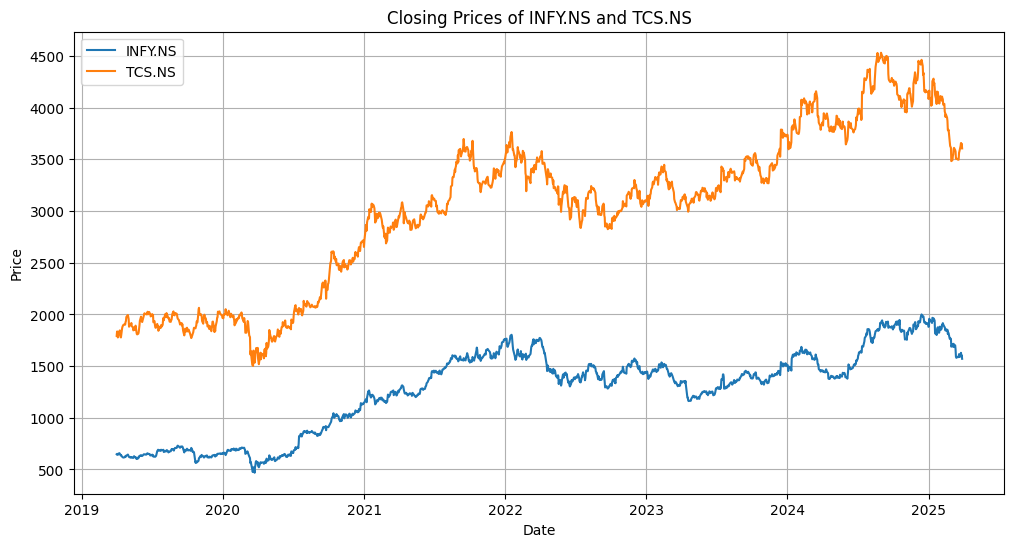

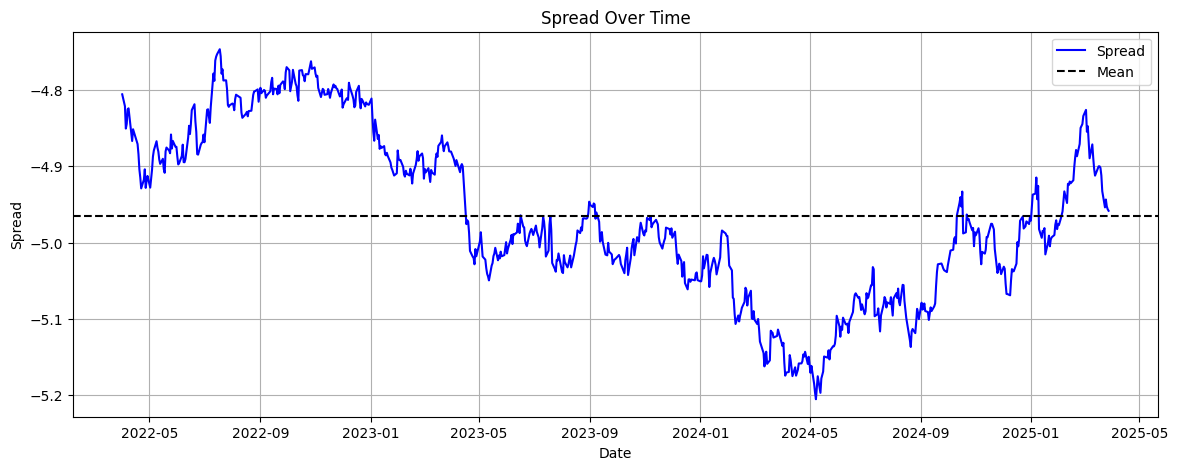

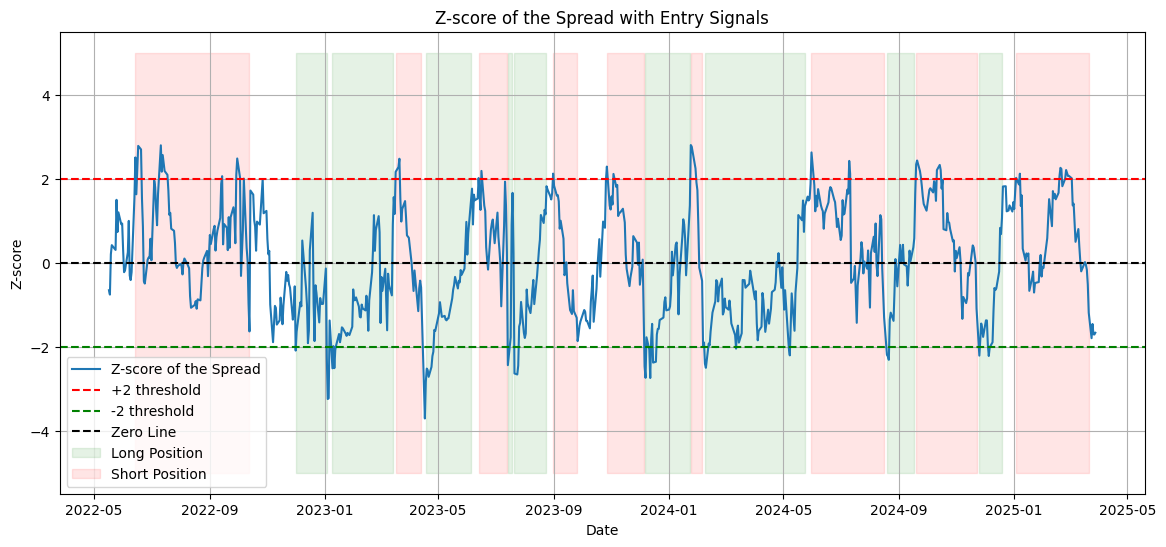

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed





                         PAIR TRADING BACKTEST RESULTS                          

                                PAIR INFORMATION                                
--------------------------------------------------------------------------------
Asset 1: INFY.NS
Asset 2: TCS.NS
Hedge Ratio: 1.503918
Test Period: 2022-04-01 to 2025-03-31
Total Trading Days: 740


                              PERFORMANCE METRICS                               
--------------------------------------------------------------------------------
Initial Capital: 50,000.00 Rs
Final Capital: 76,996.81 Rs
Absolute Profit/Loss: 26,996.81 Rs
Cumulative Return: 53.99%
Annualized Return: 15.84%
Annualized Volatility: 19.39%
Annualized Sharpe Ratio: 0.86
Maximum Drawdown: -17.36%
Calmar Ratio: 0.91


                               TRADING STATISTICS                               
--------------------------------------------------------------------------------
Total Trades: 31
Trade Frequency: 0.88 trades per month
W


[*********************100%***********************]  2 of 2 completed


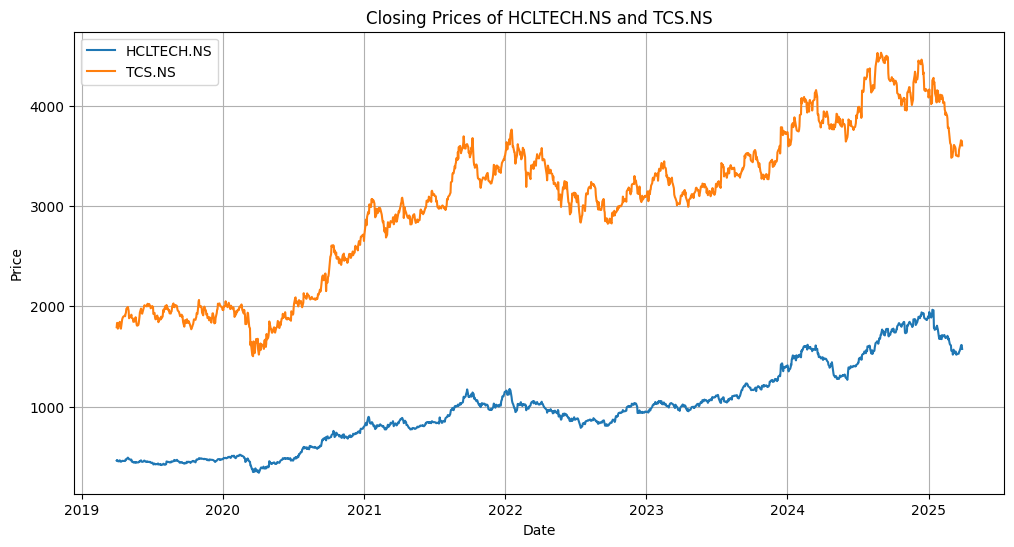

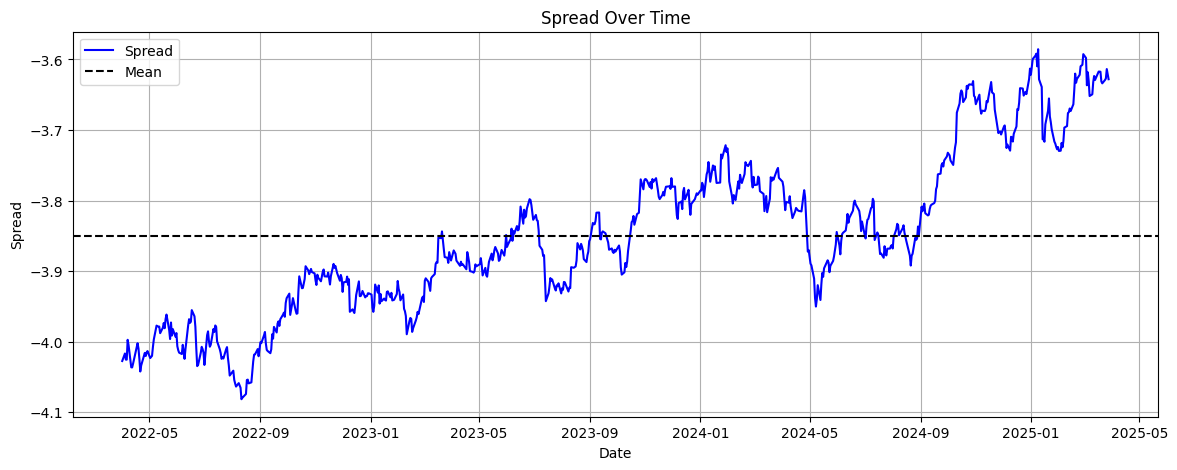

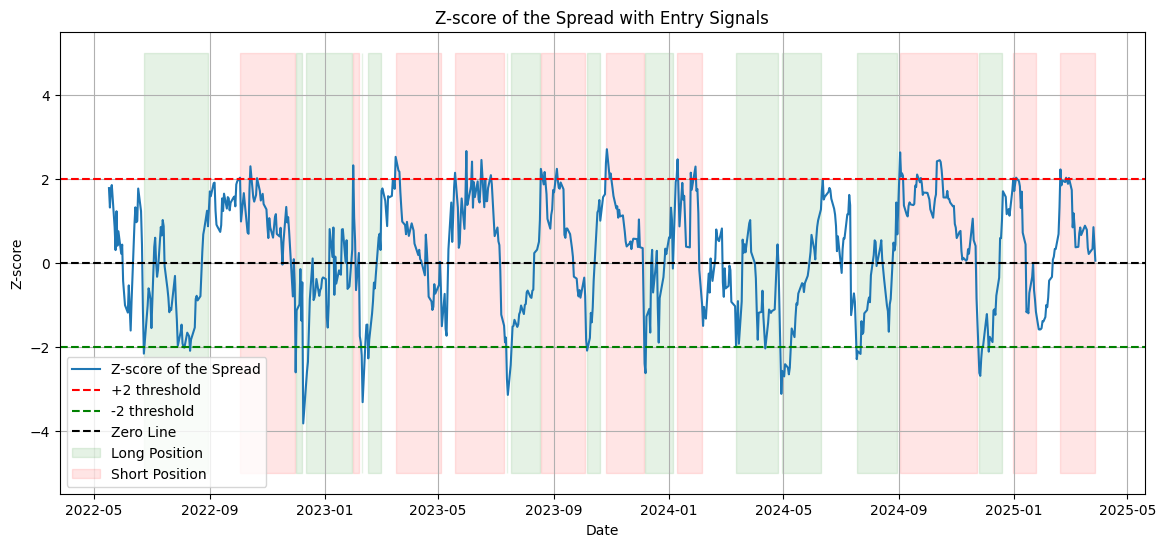





                         PAIR TRADING BACKTEST RESULTS                          

                                PAIR INFORMATION                                
--------------------------------------------------------------------------------
Asset 1: HCLTECH.NS
Asset 2: TCS.NS
Hedge Ratio: 1.341776
Test Period: 2022-04-01 to 2025-03-31
Total Trading Days: 740


                              PERFORMANCE METRICS                               
--------------------------------------------------------------------------------
Initial Capital: 50,000.00 Rs
Final Capital: 82,171.19 Rs
Absolute Profit/Loss: 32,171.19 Rs
Cumulative Return: 64.34%
Annualized Return: 18.43%
Annualized Volatility: 18.30%
Annualized Sharpe Ratio: 1.02
Maximum Drawdown: -18.68%
Calmar Ratio: 0.99


                               TRADING STATISTICS                               
--------------------------------------------------------------------------------
Total Trades: 39
Trade Frequency: 1.11 trades per mont

In [243]:
initial_capital = 100000
top_n_pairs = 2
weights = [1/2,1/2]
selected_pairs = final_pairs[:top_n_pairs]
all_results = []  # We'll store all the backtest results here
for i,temp in enumerate(selected_pairs):
  pair=[temp[0],temp[1]]
  hedge_ratio=temp[6]
  weight = weights[i]
  pair_capital = initial_capital * weight
  print("\n\nAnalysing the pair \n",pair)
  print(f"Hedge ratio is {hedge_ratio}\n")
  print(f"Capital allocation: {weight*100:.1f}% (Rs {pair_capital:,.2f})")
  train_data = yf.download(pair, start=start_train, end=end_train,auto_adjust=True)['Close']
  test_data = yf.download(pair, start=start_test, end=end_test,auto_adjust=True)['Close']
  full_data = yf.download(pair, start=start_train, end=end_test,auto_adjust=True)['Close']

  plt.figure(figsize=(12, 6))
  plt.plot(full_data.index, full_data[pair[0]], label=pair[0])
  plt.plot(full_data.index, full_data[pair[1]], label=pair[1])
  plt.title(f'Closing Prices of {pair[0]} and {pair[1]}')
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.legend()
  plt.grid(True)
  plt.show()
  print("\n\n")

  results = backtest_pair(
    testing_data=test_data,
    asset1=pair[0],
    asset2=pair[1],
    hedge_ratio=hedge_ratio,
    entry_threshold=2,
    exit_threshold=-1.5,
    stoploss_threshold=3,
    lookback=30,
    transaction_cost=0.001,
    capital_per_pair=pair_capital
  )

  # Plot Spread
  spread=results['spread']
  plt.figure(figsize=(14,5))
  plt.plot(spread.index, spread, label='Spread', color='blue')
  plt.axhline(spread.mean(), color='black', linestyle='--', label='Mean')
  plt.title('Spread Over Time')
  plt.xlabel('Date')
  plt.ylabel('Spread')
  plt.legend()
  plt.grid(True)
  plt.show()
  print("\n\n")



  # Plot z-score
  zscore=results['z_score']
  positions=results['positions']

  plt.figure(figsize=(14, 6))
  plt.plot(zscore, label='Z-score of the Spread')
  plt.axhline(2, color='red', linestyle='--', label='+2 threshold')
  plt.axhline(-2, color='green', linestyle='--', label='-2 threshold')
  plt.axhline(0, color='black', linestyle='--', label='Zero Line')

  # Overlay shaded regions for long/short positions
  if 'positions' in results and 'signal' in results['positions'].columns:
      positions = results['positions']

      plt.fill_between(positions.index, -5, 5,
                      where=positions['signal'] == 1,
                      color='green', alpha=0.1, label='Long Position')

      plt.fill_between(positions.index, -5, 5,
                      where=positions['signal'] == -1,
                      color='red', alpha=0.1, label='Short Position')

  plt.title("Z-score of the Spread with Entry Signals")
  plt.xlabel("Date")
  plt.ylabel("Z-score")
  plt.legend()
  plt.grid(True)
  plt.show()

  print("\n\n")
  print("=="*80)



  all_results.append(results)

  # Print the results with the revised function
  print_backtest_results(results, initial_capital=pair_capital)



#Portfolio Performance




                         OVERALL PORTFOLIO PERFORMANCE                          

                         PORTFOLIO PERFORMANCE SUMMARY                          

                              PORTFOLIO ALLOCATION                              
--------------------------------------------------------------------------------
Pair                 Weight     Capital        
---------------------------------------------
INFY.NS-TCS.NS       50.0%      50,000.00 Rs   
HCLTECH.NS-TCS.NS    50.0%      50,000.00 Rs   


                             PORTFOLIO INFORMATION                              
--------------------------------------------------------------------------------
Number of Pairs: 2
Test Period: 2022-04-01 to 2025-03-31
Total Trading Days: 740


                               PORTFOLIO METRICS                                
--------------------------------------------------------------------------------
Initial Capital: 100,000.00 Rs
Final Capital: 159,168.00 Rs
Absolute Pro

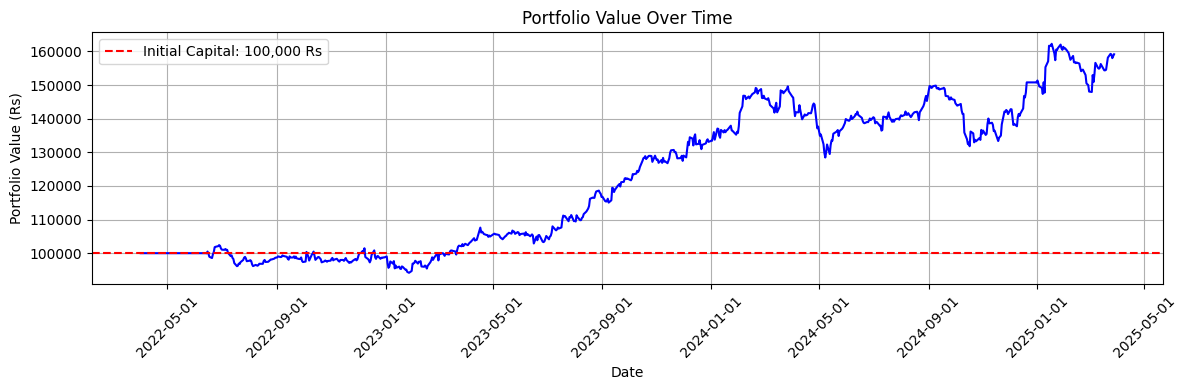

<Figure size 640x480 with 0 Axes>

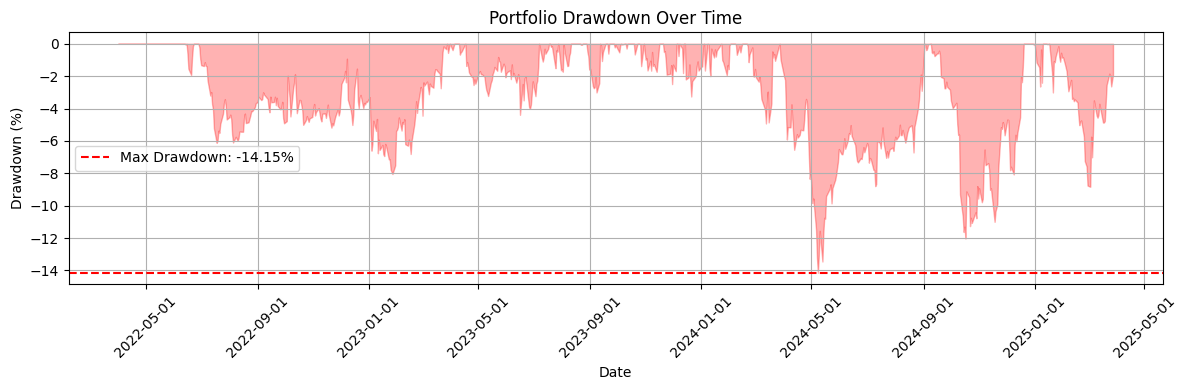

<Figure size 640x480 with 0 Axes>

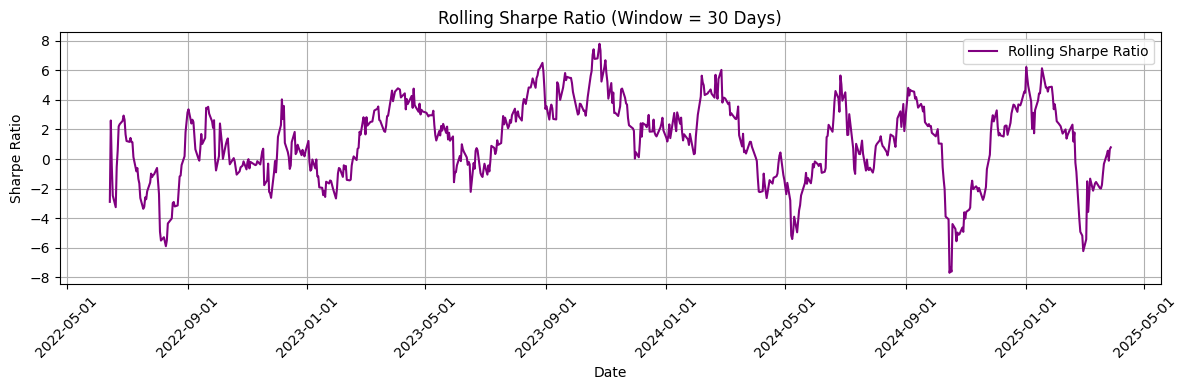

In [244]:
print("\n\n")
print("=="*40)
print(f"{' OVERALL PORTFOLIO PERFORMANCE ':^80}")
print("=="*40)

portfolio_df = print_weighted_portfolio_metrics(all_results, weights, initial_capital=initial_capital,
                                               start_test_date=start_test, end_test_date=end_test)
